## 참고
- https://github.com/rlaalstn1504/NLP_class/tree/main

## HTML에서 class와 id(CSS Selector)
HTML에서 class와 id는 요소를 식별하고 스타일링 또는 JavaScript와 상호작용하기 위해 사용되는 속성이다. 

- class 선택자: 요소에 하나 이상의 이름 부여
    - 여러 요소에 동일한 class 지정 가능
    - 한 요소에 여러 개의 class를 공백으로 구분하여 지정 가능
- 예시: 
    - `<div class="highlight>이 영역은 강조됩니다</div>`
    - `<p class="highlight">이 문단도 강조됩니다.</div>`
- id 선택자: 요소에 고유한 이름을 부여하여 특정 요소를 식별하기 위해 사용
    - 한 문서 내에서 고유해야 하므로, 동일한 id를 가진 요소가 여러 개 있으면 안 됨.
- 예시:
    - `<hi id="main-title">이것은 메인 제목입니다.</h1>`

## 기본 크롤링 

In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get("https://example.com")
html = response.text
print(html, end = "\n")

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

In [3]:
soup = BeautifulSoup(html, 'html.parser')
title = soup.find('h1').text
title

'Example Domain'

In [5]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://exmple.com")

title = driver.title
print(title)

# 브라우저 종료
driver.quit()

개인 정보 보호 오류


In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()
url = "https://example.com"
driver.get(url)

# find_element("tag name", "태그이름")으로 지정된 태그 이름을 가진 첫 번째 요소 반환 
header = driver.find_element("tag name", "h1")
print(header.text)

driver.quit()

Example Domain


## BeautifulSoup Method

| 메서드            | 설명                      | 반환값               | 특징         |
| -------------- | ----------------------- | ----------------- | ---------- |
| `find()`       | 조건에 맞는 **첫 번째 요소** 탐색   | `Tag` 객체          | 후손 전체 탐색   |
| `find_all()`   | 조건에 맞는 **모든 요소** 탐색     | `ResultSet` (리스트) | 반복문에 사용    |
| `select_one()` | **CSS 선택자**로 첫 번째 요소 탐색 | `Tag` 객체          | 복잡한 구조에 유리 |
| `select()`     | **CSS 선택자**로 모든 요소 탐색   | `ResultSet` (리스트) | 유연한 선택 가능  |


- find, find_all: 태그명 + 속성 조합 (find("div", class_="title"))
- select, select_one: CSS 선택자 기반 (select("div.title > a"))
- 자식의 자식도 탐색 가능 (후손 전부 탐색)

# Selenium Method

| 메서드                            | 설명         | 반환값                | 특징            |
| ------------------------------ | ---------- | ------------------ | ------------- |
| `find_element(By.XXX, "선택자")`  | 첫 번째 요소 탐색 | `WebElement`       | 실패 시 예외 발생    |
| `find_elements(By.XXX, "선택자")` | 모든 요소 탐색   | `List[WebElement]` | 실패해도 빈 리스트 반환 |

`By` 종류

| `By` 타입                | 설명        | 예시                          |
| ---------------------- | --------- | --------------------------- |
| `By.ID`                | `id` 속성   | `"headline"`                |
| `By.CLASS_NAME`        | 클래스 이름    | `"news_title"`              |
| `By.TAG_NAME`          | 태그 이름     | `"a"`, `"div"`              |
| `By.NAME`              | `name` 속성 | `"search"`                  |
| `By.LINK_TEXT`         | 링크 텍스트 전체 | `"뉴스"`                      |
| `By.PARTIAL_LINK_TEXT` | 링크 텍스트 일부 | `"뉴"`                       |
| `By.CSS_SELECTOR`      | CSS 선택자   | `"div.title > a"`           |
| `By.XPATH`             | XPath 선택자 | `"//div[@class='title']/a"` |

- 보통은 직계 자식만 탐색
- `By.CSS_SELECTOR`, `By.XPATH`는 후손 탐색 가능

### BeautifulSoup를 활용한 Google news 정보 크롤링

In [20]:
def parse_url(url, params = None):
    headers = {'User-Agent':"Mozilla/5.0"}
    r = requests.get(url, params, headers = headers)
    
    if r.status_code == requests.codes.ok:
        r.encoding = 'utf-8'
        return BeautifulSoup(r.text, 'html.parser')
    else:
        return None

In [21]:
soup = parse_url("https://news.daum.net/")
soup is not None

True

In [22]:
for a in soup('a', class_ = "item_newsheadline2"):
    # 제목 추출; string으로 추출하되 공백 제거 
    # css selector가 "tit_txt"인 곳의 <strong> 태그에서 수집
    title = a.find('strong', class_ = "tit_txt").string.strip()
    url = a['href']
    
    span = a.find('span', class_ = "txt_info")
    source = span.string if span else "Unknown Source"
    
    print(title, url, source, sep = "\t")

‘고발사주’ 손준성 탄핵 기각…“정치중립 위반, 파면할 정돈 아냐”	https://v.daum.net/v/20250717163103041	문화일보
"처음 중국 왔을 땐 모두 없었다"…젠슨 황 극찬 中기업 11곳은(종합)	https://v.daum.net/v/20250717163039022	연합뉴스
중부지방 폭우 내린 데 또 폭우…내일부턴 남부지방 ‘극한호우’	https://v.daum.net/v/20250717162741866	경향신문
남중국해서 中·필리핀 긴장 고조…美, 선박 수리시설 건설(종합)	https://v.daum.net/v/20250717153827284	연합뉴스
경남 산청에 시간당 90mm 이상 집중호우…침수 주의	https://v.daum.net/v/20250717153103916	KBS
연준 독립성 훼손 우려에 금리 급등…"그림자 연준 될 수도"	https://v.daum.net/v/20250717152727719	한국경제TV
신임 과기정통부 장관 “AI 개발 그치지 않고 모든 영역 AX 지원”	https://v.daum.net/v/20250717152541633	문화일보
[르포]"쏟아진 물폭탄에 우산 쓰고도 다 젖어"...전쟁 같은 출근길[종합]	https://v.daum.net/v/20250717151205010	파이낸셜뉴스
[종합] 경기도 집중호우 피해 속출…오산 교차로 옹벽 붕괴로 1명 사망	https://v.daum.net/v/20250717150229547	인천일보
"시민 안전 최우선"…강기정 시장, 집중호우 긴급 점검	https://v.daum.net/v/20250717161824363	아시아경제
해남군, 민생회복 쿠폰 지급…"최대 50만원"	https://v.daum.net/v/20250717144225408	아시아경제
‘평범한 삶’에 기록의 빛을 비춘다	https://v.daum.net/v/20250717124423874	한겨레
"권력 최상부 구조 파헤쳐야… 안 그러면 '제2의 윤석열' 나와"	https://v.daum.net

### Selenium을 활용한 Google News 크롤링
- CSS_SELECTOR
- 뉴스 데이터 10개 크롤링하여 출력

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

chrome_options = Options()

chrome_options.add_argument("--headless") # 백그라운드 실행
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("user-agent-Mozilla/5.0") # User-Agent 설정

driver = webdriver.Chrome(options = chrome_options)

# query = input()
url = "https://news.daum.net/"

driver.get(url)
time.sleep(2) # 2초 대기 

# XPATH로 접근해보기 
#print(driver.find_elements(By.XPATH, '//*[@id="58d84141-b8dd-413c-9500-447b39ec29b9"]/ul'))

# 드라이버가 get한 html 태그 중 "item_newsheadline" 선택자 수집 
# articles = driver.find_elements(By.XPATH, '//*[@id="58d84141-b8dd-413c-9500-447b39ec29b9"]/ul').text
articles = driver.find_elements(By.CLASS_NAME, "list_newsheadline2")
# print(articles.prettify()[:3000])
print(type(articles)) # articles은 list라서 driver의 속성 사용 X, WebElement로 변경해줘야됨 

<class 'list'>


- find_element(By.TAG_NAME, "li"): 직계 자식까지만 탐색
- find_element(By.CSS_SELECTOR,"li"): 깊은 구조도 커버 가능 

In [ ]:
for article in articles:
  # TAG_NAME으로 접근; 태그 이름 하나만 받아서 선택 
  li_element = article.find_element(By.TAG_NAME, "li")
  # li > a로 접근 가능 
  a_element = li_element.find_element(By.TAG_NAME, "a")
  print(a_element.get_attribute("href"))

https://v.daum.net/v/20250718153439431
https://v.daum.net/v/20250718151842891
https://v.daum.net/v/20250718142344846
https://v.daum.net/v/20250718140942303


In [29]:
for article in articles:
  # 여러 개의 태그를 선택하려면 CSS_SELECTOR를 통해 바로 접근 가능 
  li_elements = article.find_elements(By.TAG_NAME, "li")
  a_element = article.find_element(By.CSS_SELECTOR, "li > a")
  href = a_element.get_attribute("href")
  
  for li_element in li_elements:
  # class_name으로 접근 후 content의 text 부분만 추출 
    contents_thumb = li_element.find_element(By.CLASS_NAME, "cont_thumb")
    contents_thumb = contents_thumb.find_element(By.TAG_NAME, "strong").text
    print(contents_thumb)
  

李대통령 "'오산 옹벽사고', 왜 도로 통제 없었나"[종합]
'서울서부지법 난동' 전도사 5·18특별법 위반 징역 1년 구형(종합)
서울 집값 무섭게 오르더니…주택시가총액 역대 최대치 근접
‘제국의 위안부’ 내용 칼질 가처분 10년만 취소
전국에 쏟아진 폭우에 4명 사망·2명 실종…5천661명 일시대피(종합)
‘이래서 바늘구멍?’ 대기업 20대 고용 대폭 줄어…4대 그룹별 성적은?
민생회복 소비쿠폰, 내수 살리기 신호탄 되나
"폭우로 아우성인데" 광주시의회 예결특위 자리다툼 '뭇매'(종합)
[단독] 금감원, 美 주간거래 중단 사고 보상 불가 결론
"개발이익은 외부로, 지역 허탈"…전남 대규모 사업 '역차별' 논란
트럼프, 미성년자 성착취범에 ‘음란 편지’…커지는 진상 규명 목소리
달리기와 번역의 공통점을 아세요? [.txt]
[잠시만요] 서울시복지재단 진수희, "마지막 소명이라는 각오로 봉사"
‘하루 12캔 콜라광’ 트럼프 “사탕수수 설탕 써야”
[그래픽] 내란특검 수사 주요 일지
[데일리안 시사만평] 이재용 '불법 승계' 무죄 확정… 허송 9년 세월은 누가 보상하나?


### 네이버 뉴스 검색 결과 파싱(`BeautifulSoup`)
- Google news와 구조가 다른 Naver에서 뉴스 기사 크롤링 
- Naver News 탭에서 헤드라인 크롤링

In [36]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time 
import requests 

# chrome_options = Options()

# chrome_options.add_argument("--headless") # 백그라운드 실행
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("user-agent-Mozilla/5.0") # User-Agent 설정

# driver = webdriver.Chrome(options = chrome_options)

def parse_url(url, params = None):
    headers = {'User-Agent':"Mozilla/5.0"}
    r = requests.get(url, params, headers = headers)
    
    if r.status_code == requests.codes.ok:
        r.encoding = 'utf-8' # 인코딩 작업 필수 
        return BeautifulSoup(r.text, 'html.parser')
    else:
        return None

# IT 뉴스 
url = "https://news.naver.com/section/105"

soup = parse_url(url)
time.sleep(2)
print(soup is not None)

True


In [38]:
soup

<!DOCTYPE html>

<html data-useragent="Mozilla/5.0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport">
<meta content="IT/과학 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/section/105" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="모바일, 인터넷, SNS, 통신 등 IT/과학 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="IT/과학 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ss

In [ ]:
for li in soup('li', class_ = "sa_item _SECTION_HEADLINE"):
    
    content = li.find('div', class_ = "sa_text_lede").text
    url = li.find("a", class_ = "sa_text_title _NLOG_IMPRESSION")
    url = url['href']
    
    # span = a.find('span', class_ = "txt_info")
    # source = span.string if span else "Unknown Source"
    
    print(content, url, sep = "\n")
    print("\n")

한국핵융합에너지연구원이 국제핵융합실험로 ITER에 170억 원 규모의 수소저장용기를 추가 공급한다. 한국핵융합에너지연구원은 17일(현지 시간) 프랑스 카다라쉬에서 중성입자빔용 수소저장용기(NBSB)에 대한 업무 협약
https://n.news.naver.com/mnews/article/011/0004510746


FT “챗GPT에 결제 기능 탑재 준비” 인력 이탈·MS와 갈등 심화·재정 악화 삼중고 직면한 오픈AI, 새 수익 모델 모색 오픈AI가 ‘챗GPT’ 내에서 이용자들이 제품을 검색하고 구매할 수 있도록 결제 시스템을
https://n.news.naver.com/mnews/article/366/0001093445


작년 하반기 수사기관에 넘긴 통신이용자정보 41%↓ 지난해 하반기 수사기관이 요청한 통신이용자정보가 1년 전보다 41% 급감한 것으로 나타났다. 18일 과학기술정보통신부가 발표한 '2024년 하반기 통신이용자정보 및
https://n.news.naver.com/mnews/article/001/0015515189


엔씨AI는 차세대 게임 창작 인재를 발굴하고 자사 인공지능(AI) 기술을 보다 폭넓게 활용할 수 있도록 지원하는 '제1회 엔씨 AI 바르코 3D 게임 제작 공모전'을 개최한다고 18일 밝혔다. 엔씨AI는 이번 공모전
https://n.news.naver.com/mnews/article/031/0000949754


카카오가 패션·뷰티 업종 사업자를 대상으로 '카카오비즈니스 사장님 커뮤니티' 참가 희망자를 모집한다고 18일 밝혔다. 이 프로그램은 같은 업종에 종사하는 사업자 간 교류의 장을 마련하고 맞춤형 마케팅 교육을 제공해
https://n.news.naver.com/mnews/article/003/0013370646




In [48]:
query = input("네이버 뉴스에서 검색할 검색어 입력:")
params = {'where':"news", "query":query}
headers = {"User-Agent":"Mozilla/5.0"}

soup = parse_url('https://search.naver.com/search.naver', params)
soup.title

<title>인공지능 : 네이버 뉴스검색</title>

In [62]:
for div in soup("div", class_ = "group_news"):
    # news_template = div.find_all("div", class_ = "sds-comps-vertical-layout sds-comps-full-layout fds-news-item-list-tab")
    # # print(news_template)
    # print(len(news_template))
    
    # for news in news_template:
    
    news_template = div.find_all("div", class_ = "sds-comps-vertical-layout sds-comps-full-layout G4iVzGtaRpoFqUVVp1bP")
    for news in news_template:
        title = news.find("span", class_ = "sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1")
        contents = news.find("span", class_ = "sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-3 sds-comps-text-type-body1")
        url = news.find("a", class_ = "OqRuWgaJW9JVSHu5Dl92 TajF3tviPufdG569L8jV")
        
        title = title.text
        contents = contents.text
        url = url['href']
    
        
        print(f"title: {title}, contents: {contents}\n url: {url}\n")
    

title: 정부, 韓 독자 AI 성능평가 위한 데이터셋 구축 추진, contents: 과학기술정보통신부는 한국지능정보사회진흥원(NIA)과 독자 인공지능 기초 모형(독자 AI 파운데이션 모델)을 대상으로 한 '성능평가 데이터셋 구축 사업' 수행기관을 7월 17일부터 8월 7일까지 공개 모집한다고 밝혔다. 이번 사업은 독자 AI 파운데이션 모델 프로젝트의 일환으로 추진된다. 성능평가 데이터셋을...
 url: https://www.newsis.com/view/NISX20250717_0003255183

title: “인공지능이 공장장, 매년 수억원씩 절감”, contents: 수십 킬로 떨어진 공장 제어하는 디지털 트윈도 해보려고 합니다.” 대한상공회의소(회장 최태원)가 18일 경주 라한셀렉트에서 개최한 인공지능(AI) 토크쇼 자리에서 한 지방 기업인은 이같이 말했다. ‘모두의 AI, 우리의 AI’를 주제로 열린 행사에는 최태원 회장, 정신아 카카오 대표, AI 세탁소, AI 검색엔진...
 url: https://www.naeil.com/news/read/555169?ref=naver

title: 인공지능이 알아서 사진 분류…네이버, 플레이스 AI 이미지 필터 도입, contents: 네이버는 플레이스 상세 페이지에 인공지능(AI)을 접목한 이미지 필터를 새로 선보인다고 18일 밝혔다. 네이버에 따르면 이미지 필터는 장소의 세부 주제에 대한 이미지를 분류해 노출하는 기능으로, AI 기술이 활용돼 정확도 높고 세분화된 탐색이 가능해졌다. 식당의 경우 ‘음식·음료’, ‘메뉴’, ‘풍경’...
 url: https://www.sedaily.com/NewsView/2GVEC9UI4T

title: 부산에 스마트공장 167개…"인공지능 제조 전환에 유리", contents: 부산에 도입된 스마트공장이 167개여서 인공지능(AI) 제조 전환에 유리한 여건을 갖추고 있다는 분석 보고서가 나왔다. 부산과학기술고등교육진흥원(BISTEP)은 18일 '제조 혁신을 위한 인공지능

### 금융 뉴스 수집 프로젝트
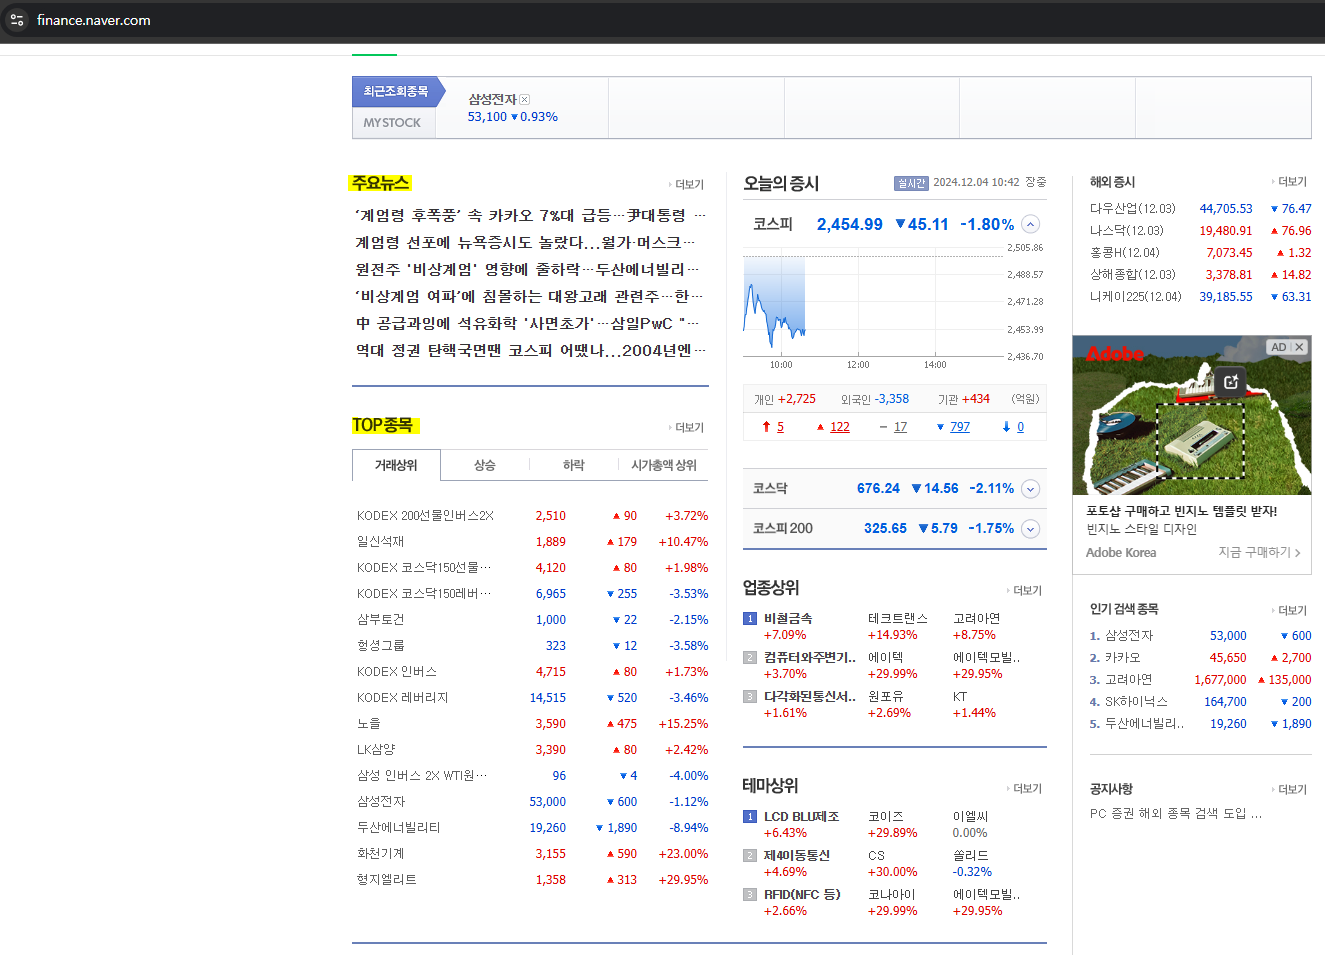

In [46]:
# 필요한 라이브러리를 임포트합니다.
import requests  # 웹 페이지의 데이터를 요청하는 데 사용됩니다.
from bs4 import BeautifulSoup  # HTML 데이터를 파싱하는 데 사용됩니다.
import pandas as pd  # 데이터프레임 형태로 데이터를 저장하고 처리하는 데 사용됩니다.
import datetime  # 날짜를 다루기 위해 사용됩니다.

In [47]:
# 결과를 저장할 데이터프레임 생성
df_total = pd.DataFrame()


# 네이버 금융의 주식 히스토리 URL 구성
url = 'https://finance.naver.com/'

# HTTP GET 요청을 통해 데이터 가져오기
response = requests.get(url)
response.raise_for_status()  # 요청에 실패하면 예외를 발생시킵니다.

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')

In [48]:
soup.find('div', class_='section_strategy').find('li')

<li>
<span><a href="/news/news_read.naver?mode=mainnews&amp;office_id=031&amp;article_id=0000949677" onclick="clickcr(this, 'tdn.list', '031_0000949677', '0', event);">'환인제약 닮은꼴' 코츠테크놀로지 자사주 EB 발행</a></span>
</li>

In [49]:
aa = soup.find('div', class_='section_strategy').find_all('li')

In [50]:
print('기사링크:',aa[0].find('a')['href'])
print('기사제목',aa[0].find('a').text)

기사링크: /news/news_read.naver?mode=mainnews&office_id=031&article_id=0000949677
기사제목 '환인제약 닮은꼴' 코츠테크놀로지 자사주 EB 발행


In [51]:
pd.DataFrame([(i.find('a').text, i.find('a')['href']) for i in aa], columns=['title', 'link'])

,title,link
0,'환인제약 닮은꼴' 코츠테크놀로지 자사주 EB 발행,/news/news_read.naver?mode=mainnews&office_id=...
1,'오너리스크' 턴 삼성·'집사게이트' 휘말린 키움…증권가 명암,/news/news_read.naver?mode=mainnews&office_id=...
2,"한일시멘트, 한일현대시멘트 흡수 합병키로… 애프터마켓서 급등",/news/news_read.naver?mode=mainnews&office_id=...
3,"코스피, 외인·기관 순매수 전환에 3200선 회복 '눈앞'",/news/news_read.naver?mode=mainnews&office_id=...
4,“-9%급락 SK하이닉스에 무슨 일 있었던 거야”…코스피 등락하다 3190선 강보합...,/news/news_read.naver?mode=mainnews&office_id=...
5,'관세 전쟁'에 우려↑…목표전환형 펀드 '흥행' 계속되나,/news/news_read.naver?mode=mainnews&office_id=...
